## Inversion Sapmling


We observe that CDF=u is uniform over [0,1] and r is equal to sqrt(u). Therefore we transform r and theta into cartesian coordinates.

In [204]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


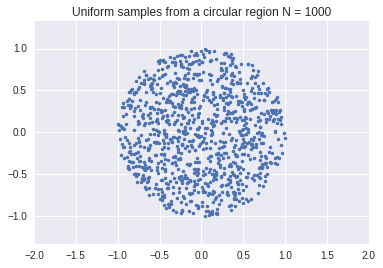

In [205]:
N = 1000

r = np.sqrt(np.random.uniform(0, 1, N))
theta = np.random.uniform(0, 2 * np.pi, N)
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.title('Uniform samples from a circular region N = 1000')
plt.axis('equal')
plt.axis([-2,2,-2,2])
plt.plot(x,y,'.')
plt.show()

## REJECTION SAMPLING

For p-norm unit ball, we can choose the samples from the unit ball we obtained from previous question. Then we reject the outside of the p-norm region

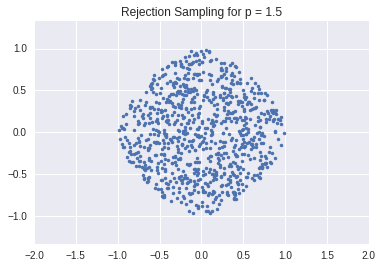

Acceptance rate for p=1.5: 0.862


In [206]:
def is_accepted(x, y, p):
    return np.power((np.power(np.absolute(x),p) + np.power(np.absolute(y),p)),(1/p)) <= 1

accepted_x = []
accepted_y = []

for i in range(N):
    if (is_accepted(x[i], y[i], 1.5)):
        accepted_x.append(x[i])
        accepted_y.append(y[i])
        
plt.title('Rejection Sampling for p = 1.5')
plt.axis('equal')
plt.axis([-2,2,-2,2])
plt.plot(accepted_x, accepted_y,'.')
plt.show()
print 'Acceptance rate for p=1.5: ' + str(float(len(accepted_x))/N)

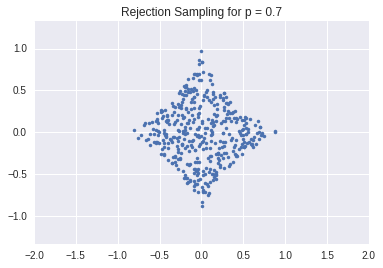

Acceptance rate for p=0.7: 0.419


In [207]:
def is_accepted(x, y, p):
    return np.power((np.power(np.absolute(x),p) + np.power(np.absolute(y),p)),(1/p)) <= 1

accepted_x = []
accepted_y = []

for i in range(N):
    if (is_accepted(x[i], y[i], 0.7)):
        accepted_x.append(x[i])
        accepted_y.append(y[i])
        
plt.title('Rejection Sampling for p = 0.7')
plt.axis('equal')
plt.axis([-2,2,-2,2])
plt.plot(accepted_x, accepted_y,'.')
plt.show()
print 'Acceptance rate for p=0.7: ' + str(float(len(accepted_x))/N)

## REJECTION SAMPLING WITH GREATER ACCEPTANCE

As norm decreases, the shape gets more concave. So, instead of using unit circle as the proposal,
we can use a rotated square with edges sqrt(2) units for greater acceptance; as shown below.

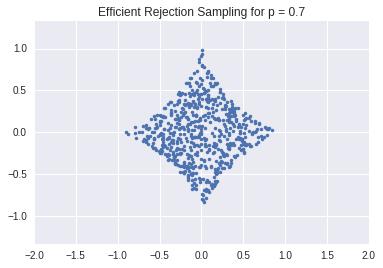

Efficient Acceptance rate for p=0.7: 0.626


In [208]:
x = np.random.uniform(-np.sqrt(2.0)/2, np.sqrt(2.0)/2, N)
y = np.random.uniform(-np.sqrt(2.0)/2, np.sqrt(2.0)/2, N)

#Rotate pi/4 degrees 
R = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], [np.sin(np.pi/4), np.cos(np.pi/4)]])

[rot_x, rot_y] = R.dot([x, y])

accepted_x = []
accepted_y = []

for i in range(N):
    if (is_accepted(rot_x[i], rot_y[i], 0.7)):
        accepted_x.append(rot_x[i])
        accepted_y.append(rot_y[i])

plt.title('Efficient Rejection Sampling for p = 0.7')
plt.axis('equal')
plt.axis([-2,2,-2,2])
plt.plot(accepted_x, accepted_y,'.')
plt.show()
print 'Efficient Acceptance rate for p=0.7: ' + str(float(len(accepted_x))/N)

We have significant increase in acceptance rate with the new proposal, comparing to unit circle.